This is a famous exercise, where we have to predict which passengers of Titanic survived.
We know the name, age, and gender of the passengers, as well as parchment, class of their cabin and a few other details.
The task is to predict which passengers survived.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
#redundancy
titanic.drop(columns=['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], inplace=True)

X = titanic.drop(columns=['survived'])
y = titanic['survived']
print('Accuracy should be at least {:d}/{:d} = {:f}%'.format(y.value_counts().max(), len(y), y.value_counts().max()/len(y)*100))

Accuracy should be at least 549/891 = 61.616162%


In [3]:
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


<AxesSubplot:>

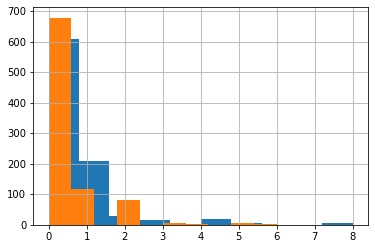

In [4]:
X['sibsp'].hist()
X['parch'].hist()

<AxesSubplot:>

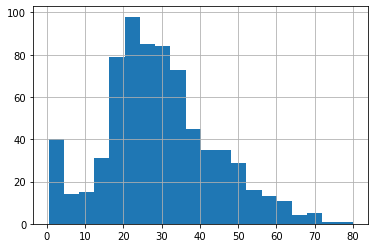

In [5]:
X['age'].hist(bins = 20)

In [6]:
X['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [7]:
X['age'].fillna(X['age'].mean(), inplace=True)
X['embarked'].fillna('S', inplace=True)
X = pd.get_dummies(X, columns=['pclass', 'sex', 'sibsp', 'parch', 'embarked'], drop_first=True)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=89)

In [9]:
X_train.head()

,age,fare,pclass_2,pclass_3,sex_male,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_Q,embarked_S
156,16.0,7.7333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
412,33.0,90.0000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
817,31.0,37.0042,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
686,14.0,39.6875,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
318,31.0,164.8667,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 89)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

In [11]:
predictions

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       169
           1       0.75      0.76      0.75        99

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



82 percent accuracy! Compared to benchmarks it is quite decent: https://www.kaggle.com/code/aravrs/titanic-models-benchmark

In [13]:
print(confusion_matrix(y_test, predictions))

[[144  25]
 [ 24  75]]


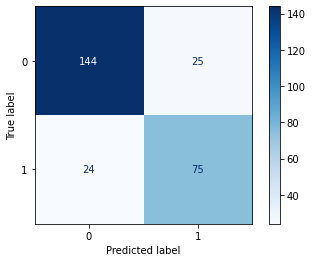

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predictions))
disp.plot(cmap = 'Blues')
plt.show()

I will compare it with a very simple neural network solution.

In [15]:
from sklearn import preprocessing

fare = X['fare'].values
age = X['age'].values
std_scaler = preprocessing.StandardScaler()
fare_scaled = std_scaler.fit_transform(fare.reshape(-1, 1))
X['fare'] = pd.DataFrame(fare_scaled)
age_scaled = std_scaler.fit_transform(age.reshape(-1, 1))
X['age'] = pd.DataFrame(age_scaled)

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

def create_model(alpha=0.001):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(19,)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(alpha), metrics=['accuracy'])
    return model

In [17]:
model = create_model(alpha=0.001)
model.fit(X_train.values.astype(float), y_train.values, epochs=11)

Epoch 1/11
20/20 [==============================] - 1s 2ms/step - loss: 1.0312 - accuracy: 0.5650
Epoch 2/11
20/20 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.6709
Epoch 3/11
20/20 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.6806
Epoch 4/11
20/20 [==============================] - 0s 1ms/step - loss: 0.6182 - accuracy: 0.6982
Epoch 5/11
20/20 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.7159
Epoch 6/11
20/20 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.7239
Epoch 7/11
20/20 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.7255
Epoch 8/11
20/20 [==============================] - 0s 1ms/step - loss: 0.5629 - accuracy: 0.7223
Epoch 9/11
20/20 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.7335
Epoch 10/11
20/20 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.7368
Epoch 11/11
20/20 [

9/9 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       169
           1       0.69      0.62      0.65        99

    accuracy                           0.75       268
   macro avg       0.74      0.73      0.73       268
weighted avg       0.75      0.75      0.75       268



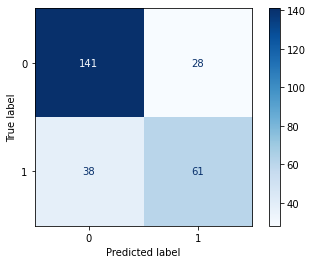

In [18]:
predictions_raw = model.predict(X_test)
n = len(y_test)
predictions = np.empty(n, dtype=int)

for i in range(n):
    predictions[i] = round(predictions_raw[i][0])  

print(classification_report(y_test, predictions))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predictions))
disp.plot(cmap = 'Blues')
plt.show()